 Доржиев Ардан АБД19-1М
 
 Задание:
 * 1) проверить VGG16 на своих изображениях (3-5 шт) - вывести prediction - сделать презу
 * 2) построить модель трансферного обучения(взять VGG16) на CIFAR100
  * попытаться улучшить - заморозить/разморозить слои VGG16, 



In [ ]:
PATH = "../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/"

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np 
from tensorflow import keras
from keras import layers, optimizers
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16 
from keras.utils.vis_utils import plot_model 
from keras.layers import Flatten, Dense, GlobalAveragePooling2D
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array
  
from tensorflow.keras.datasets import cifar100
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os, shutil
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
# Введем callback
callbacks_list = [
        keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
        keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10)  
]

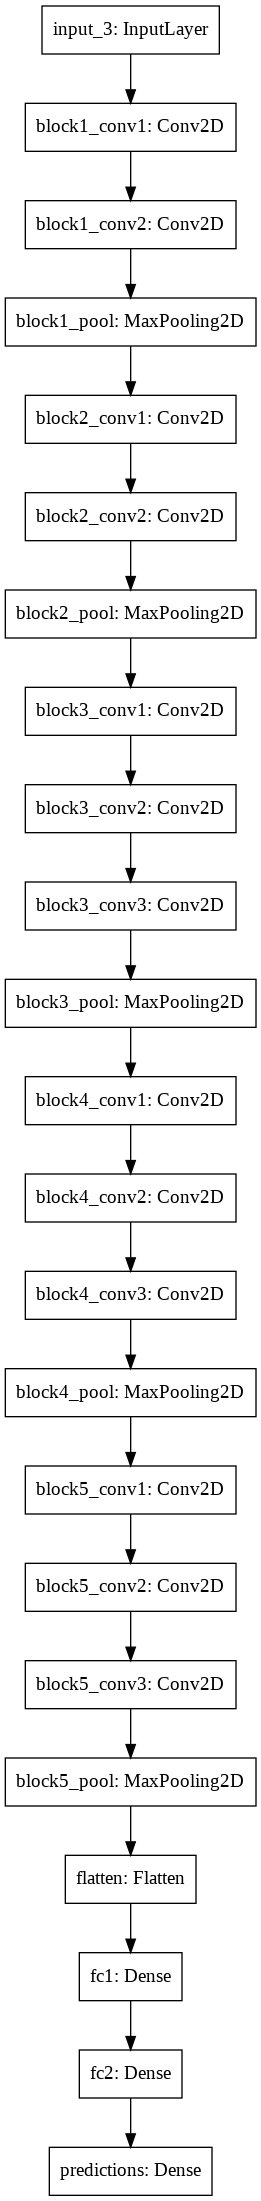

In [ ]:
model = VGG16()
plot_model(model, to_file=PATH+'vgg.png')

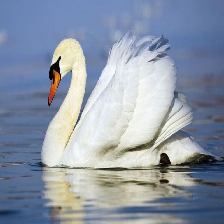

In [ ]:
image_swan = load_img(PATH+'swan.png', target_size=(224, 224))
image_swan

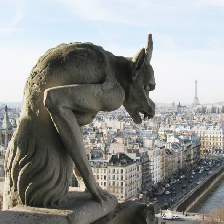

In [ ]:
image_bat = load_img(PATH+'bat.png', target_size=(224, 224))
image_bat

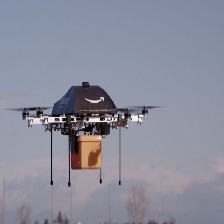

In [ ]:
image_drone = load_img(PATH+'drone.jpg', target_size=(224, 224))
image_drone

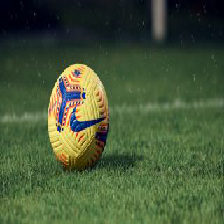

In [ ]:
image_ball = load_img(PATH+'ball.jpg', target_size=(224, 224))
image_ball

In [ ]:
image_list = [image_ball, image_bat, image_drone, image_swan]

predict_list = []
for image in image_list: 
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  y = model.predict(image)
  label = decode_predictions(y, top=3)[0]
  print('Predicted', label)
  

Predicted [('n04118538', 'rugby_ball', 0.8940418), ('n04254680', 'soccer_ball', 0.09541321), ('n03379051', 'football_helmet', 0.0027524494)]
Predicted [('n03388043', 'fountain', 0.3703522), ('n03903868', 'pedestal', 0.14699596), ('n01704323', 'triceratops', 0.096150085)]
Predicted [('n03240683', 'drilling_platform', 0.5422402), ('n03126707', 'crane', 0.15096907), ('n04552348', 'warplane', 0.072945215)]
Predicted [('n01855672', 'goose', 0.54522383), ('n02009912', 'American_egret', 0.31943297), ('n02051845', 'pelican', 0.035406686)]


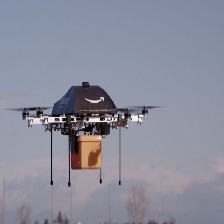

In [ ]:
image_drone = load_img(PATH+'drone.jpg', target_size=(224, 224))
image_drone

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# for file_name in files_list:
#     image = load_img('img/'+file_name, target_size=(224, 224))
#     img = mpimg.imread('img/'+file_name)
#     imgplot = plt.imshow(img)
#     plt.show()
#     image = img_to_array(image)
#     image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
#     image = preprocess_input(image)
#     y = model.predict(image)
    
#     label = decode_predictions(y)
#     label = label[0][0]
#     print('%s (%.2f%%)' % (label[1], label[2]*100))

# import os
# files_list = [i for i in os.listdir('img') if ('.png' in i) | ('.jpeg' in i) | ('.jpg' in i)]

# CIFAR100

In [ ]:
(input_train, target_train), (input_test, target_test) = cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


In [ ]:
num_classes = 100

In [ ]:
# Parse numbers as floats
X_train = input_train.astype('float32')
X_test = input_test.astype('float32')

# Normalize data
X_train = X_train / 255
X_test = X_test / 255

# Tartget to categorical 
y_train = keras.utils.to_categorical(target_train, num_classes)
y_test = keras.utils.to_categorical(target_test, num_classes)

In [ ]:
base_model = VGG16(weights='imagenet',
                   include_top=False, #отключаем классифатор - плохо
                   classes=num_classes, 
                   input_shape=(32, 32, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(10000, activation='relu')(x)

predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=X_train, y=y_train, batch_size=256,
                    epochs=40, verbose=1, 
                    validation_split=0.1, 
                    callbacks = callbacks_list,
                    shuffle=True)

Epoch 1/40
176/176 [==============================] - 6s 34ms/step - loss: 4.6054 - accuracy: 0.0098 - val_loss: 4.6066 - val_accuracy: 0.0078
Epoch 2/40
176/176 [==============================] - 6s 34ms/step - loss: 4.6054 - accuracy: 0.0088 - val_loss: 4.6068 - val_accuracy: 0.0078
Epoch 3/40
176/176 [==============================] - 6s 34ms/step - loss: 4.6053 - accuracy: 0.0099 - val_loss: 4.6071 - val_accuracy: 0.0078
Epoch 4/40
176/176 [==============================] - 6s 34ms/step - loss: 4.6053 - accuracy: 0.0093 - val_loss: 4.6072 - val_accuracy: 0.0078
Epoch 5/40
176/176 [==============================] - 6s 33ms/step - loss: 4.6053 - accuracy: 0.0099 - val_loss: 4.6074 - val_accuracy: 0.0070
Epoch 6/40
176/176 [==============================] - 6s 33ms/step - loss: 4.6053 - accuracy: 0.0098 - val_loss: 4.6075 - val_accuracy: 0.0070


In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss7.png",dpi=300,format="png")
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['train','test'])
plt.title('accuracy')

In [ ]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
#Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

# Другое задание - классификация обезьян

взять 3 класса

построить модель на VGG16 

показать пример работы

визуализоровать сетку



## Заргрузка данных 

In [ ]:
original_dataset_dir = PATH+'archive/'
original_dataset_dir

'../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/'

In [ ]:
base_dir = PATH+'archive/data_small'
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'training')
os.mkdir(train_dir)

In [ ]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [ ]:
dic_class = {'n0': "mantled_howler", 'n4': "pygmy_marmoset", 'n8': "black_headed_night_monkey"}

In [ ]:
# Train data - каталоги для каждых классов
train_n0_dir = os.path.join(train_dir, 'n0') # класс "mantled_howler"
os.mkdir(train_n0_dir)

train_n4_dir = os.path.join(train_dir, 'n4') # класс "pygmy_marmoset"
os.mkdir(train_n4_dir)

train_n6_dir = os.path.join(train_dir, 'n8') # класс "black_headed_night_monkey"
os.mkdir(train_n6_dir)

In [ ]:
# Valid data - каталоги для каждых классов
validation_n0_dir = os.path.join(validation_dir, 'n0')
os.mkdir(validation_n0_dir)

validation_n4_dir = os.path.join(validation_dir, 'n4')
os.mkdir(validation_n4_dir)

validation_n6_dir = os.path.join(validation_dir, 'n8')
os.mkdir(validation_n6_dir)

In [ ]:
# Копирование
def get_data_to_folder(from_dir, to_dir):
  fnames = os.listdir(from_dir)
  for fname in fnames:
    src = os.path.join(from_dir, fname) 
    dst = os.path.join(to_dir, fname) 
    shutil.copyfile(src, dst)

In [ ]:
class_list = ['n0', 'n4', 'n8']
data_type_list = ['training', 'validation']

for i in class_list:
  for j in data_type_list: 
    from_dir = PATH+'archive/'+j+'/'+i
    to_dir = PATH+'archive/data_small/'+j+'/'+i

    print('from_dir:' , from_dir)
    print('to_dit:' , to_dir)

    get_data_to_folder(from_dir, to_dir)

from_dir: ../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/training/n0
to_dit: ../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/data_small/training/n0
from_dir: ../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/validation/n0
to_dit: ../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/data_small/validation/n0
from_dir: ../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/training/n4
to_dit: ../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/data_small/training/n4
from_dir: ../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/validation/n4
to_dit: ../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/data_small/validation/n4
from_dir: ../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/training/n8
to_dit: ../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/data_small/training/n8
from_di

In [ ]:
# Проверим кол-во картинок
for i in class_list:
  for j in data_type_list: 
    from_dir = PATH+'archive/'+j+'/'+i
    to_dir = PATH+'archive/data_small/'+j+'/'+i
    print('Кол-во тренировочных картинок класса '+ i +' в исходнике '+j+': ', len(os.listdir(from_dir)))
    print('Кол-во тренировочных картинок класса '+ i +' в новом '+j+': ', len(os.listdir(to_dir)))

Кол-во тренировочных картинок класса n0 в исходнике training:  105
Кол-во тренировочных картинок класса n0 в новом training:  105
Кол-во тренировочных картинок класса n0 в исходнике validation:  26
Кол-во тренировочных картинок класса n0 в новом validation:  26
Кол-во тренировочных картинок класса n4 в исходнике training:  105
Кол-во тренировочных картинок класса n4 в новом training:  105
Кол-во тренировочных картинок класса n4 в исходнике validation:  26
Кол-во тренировочных картинок класса n4 в новом validation:  26
Кол-во тренировочных картинок класса n8 в исходнике training:  106
Кол-во тренировочных картинок класса n8 в новом training:  106
Кол-во тренировочных картинок класса n8 в исходнике validation:  27
Кол-во тренировочных картинок класса n8 в новом validation:  27


## Подготовка данных

In [ ]:
original_dataset_dir = PATH+'archive/'
original_dataset_dir

'../content/drive/My Drive/Нейронные сети 2_Модуль_2020/10112020/archive/'

In [ ]:
base_dir = PATH+'archive/data_small'
# os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'training')
# os.mkdir(train_dir)

In [ ]:
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

In [ ]:
dic_class = {'n0': "mantled_howler", 'n4': "pygmy_marmoset", 'n8': "black_headed_night_monkey"}

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                    train_dir, # Целевой каталог 
                    target_size=(224, 224), 
                    batch_size=20, 
                    class_mode='categorical') 

Found 315 images belonging to 3 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory( 
                    validation_dir,
                    target_size=(224, 224), 
                    batch_size=20,
                    class_mode='categorical')

Found 79 images belonging to 3 classes.


## Построение сети

In [ ]:
model = VGG16(weights='imagenet', 
              include_top=True, # подключаем классификатор
              input_shape=(224, 224, 3))

553467904/553467096 [==============================] - 4s 0us/step


#### Train data

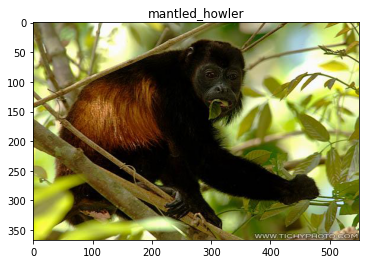

40960/35363 [==================================] - 0s 0us/step
howler_monkey (99.46%)


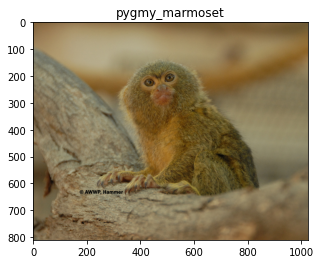

marmoset (95.82%)


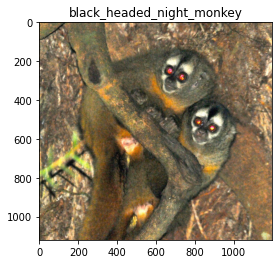

indri (95.47%)


In [ ]:
for i, v in zip([t for t in dic_class.keys()], [i for i in dic_class.values()]):
  j = 'training' # из train data посмотрим по 1 примеру 
  to_dir = PATH+'archive/data_small/'+j+'/'+i

  files_list = os.listdir(to_dir)

  k = 0
  for file_name in files_list:
    image = load_img(to_dir+'/'+file_name, target_size=(224, 224))
    img = mpimg.imread(to_dir+'/'+file_name)
    imgplot = plt.imshow(img)
    plt.title(v)
    plt.show()

    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    y = model.predict(image)
    
    label = decode_predictions(y)
    label = label[0][0]
    
    print('%s (%.2f%%)' % (label[1], label[2]*100))

    k += 1

    if k == 1: 
      break


VGG16 хорошо угадала 2ух первых, но 3 - Черноголовая ночная обезьяна(Юж Америка), это не лемуры Индри(Мадагскар)

#### valid data

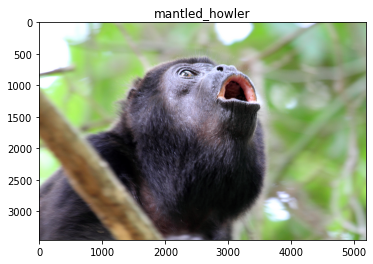

40960/35363 [==================================] - 0s 0us/step
howler_monkey (92.11%)


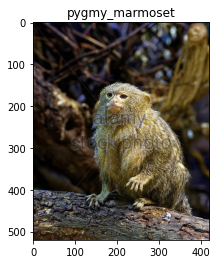

marmoset (96.31%)


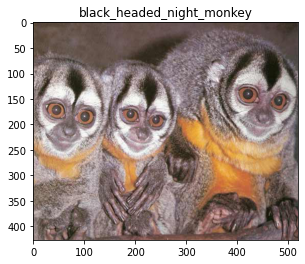

indri (68.14%)


In [ ]:
for i, v in zip([t for t in dic_class.keys()], [i for i in dic_class.values()]):
  j = 'validation' # из valid data посмотрим по 1 примеру 
  to_dir = PATH+'archive/data_small/'+j+'/'+i

  files_list = os.listdir(to_dir)

  k = 0
  for file_name in files_list:
    image = load_img(to_dir+'/'+file_name, target_size=(224, 224))
    img = mpimg.imread(to_dir+'/'+file_name)
    imgplot = plt.imshow(img)
    plt.title(v)
    plt.show()

    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    y = model.predict(image)
    
    label = decode_predictions(y)
    label = label[0][0]
    
    print('%s (%.2f%%)' % (label[1], label[2]*100))

    k += 1

    if k == 1: 
      break


Модель ошиблась с 1ой и 3ей картинкой

## Выделение признаков

In [ ]:
# Создание экземпляра сверточной основы VGG16
conv_base = VGG16(weights='imagenet', 
              include_top=False, # отключаем классификатор, будет добавлен свой
              input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Выделение признаков с расширением данных

In [ ]:
# Добавить conv_base в модель Sequential как обычный слой
model = Sequential()
model.add(conv_base)
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 21,138,243
Trainable params: 21,138,243
Non-trainable params: 0
_________________________________________________________________


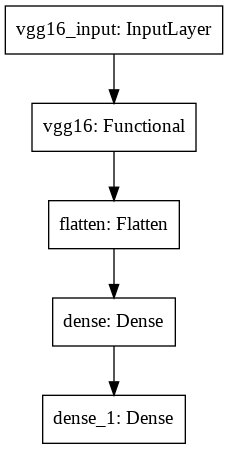

In [ ]:
plot_model(model, to_file=PATH+'model_with_vgg_layer.png')

In [ ]:
# Заморозим сверточную основу, чтобы предотвратить изменение весовых коэффициентов в ней в процессе обучения. 
print('Кол-во слоев для обучения перед заморозкой:', len(model.trainable_weights))
conv_base.trainable = False
print('Кол-во слоев для обучения после заморозки:', len(model.trainable_weights)) 

Кол-во слоев для обучения перед заморозкой: 30
Кол-во слоев для обучения после заморозки: 4


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                  train_dir, 
                  target_size=(224, 224), 
                  batch_size=20,
                  class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                        target_size=(224, 224),
                        batch_size=20, 
                        class_mode='categorical')

Found 315 images belonging to 3 classes.
Found 79 images belonging to 3 classes.


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=5, 
                              validation_data=validation_generator,
                              validation_steps=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
10/10 [==============================] - 125s 12s/step - loss: 0.9163 - acc: 0.5850 - val_loss: 0.5761 - val_acc: 0.9500
Epoch 2/5
10/10 [==============================] - 43s 4s/step - loss: 0.5450 - acc: 0.8750 - val_loss: 0.5803 - val_acc: 0.8000
Epoch 3/5
10/10 [==============================] - 17s 2s/step - loss: 0.4273 - acc: 0.9077 - val_loss: 0.4441 - val_acc: 0.9000
Epoch 4/5
10/10 [==============================] - 8s 793ms/step - loss: 0.3361 - acc: 0.9150 - val_loss: 0.3604 - val_acc: 0.9000
Epoch 5/5
10/10 [==============================] - 7s 738ms/step - loss: 0.2688 - acc: 0.9550 - val_loss: 0.3033 - val_acc: 0.9500


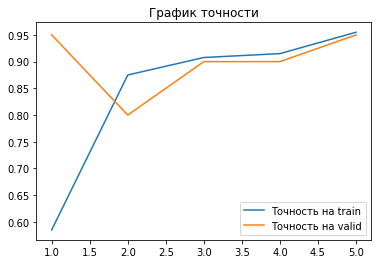

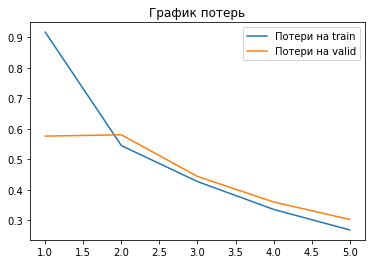

In [ ]:
# Графики работы
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Точность на train') 
plt.plot(epochs, val_acc, label='Точность на valid') 
plt.title('График точности') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Потери на train') 
plt.plot(epochs, val_loss, label='Потери на valid') 
plt.title('График потерь')
plt.legend()
plt.show()

#### train data

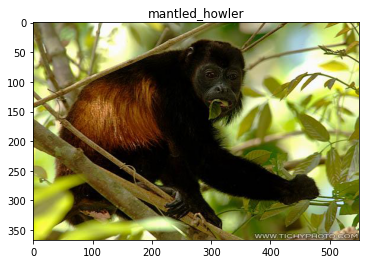

mantled_howler (100.00%)


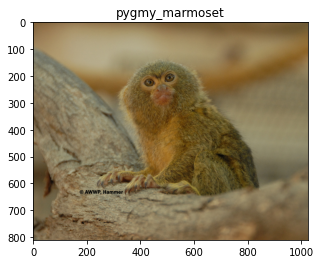

pygmy_marmoset (100.00%)


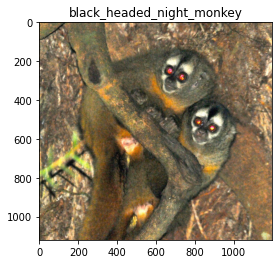

black_headed_night_monkey (100.00%)


In [ ]:
for i, v in zip([t for t in dic_class.keys()], [i for i in dic_class.values()]):

  dic_keys = [t for t in dic_class.keys()]
  dic_values = [i for i in dic_class.values()]

  j = 'training' # из train data посмотрим по 1 примеру 
  to_dir = PATH+'archive/data_small/'+j+'/'+i

  files_list = os.listdir(to_dir)

  k = 0
  for file_name in files_list:
    image = load_img(to_dir+'/'+file_name, target_size=(224, 224))
    img = mpimg.imread(to_dir+'/'+file_name)
    imgplot = plt.imshow(img)
    plt.title(v)
    plt.show()

    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    y = model.predict(image)
    
    label = np.argmax(y[0]) #decode_predictions(y)
    label_name = dic_values[label]
    label_prob = y[0][label]
    
    print('%s (%.2f%%)' % (label_name, label_prob*100))

    k += 1

    if k == 1: 
      break


VGG16 хорошо угадала 2ух первых, но 3 - Черноголовая ночная обезьяна(Юж Америка), это не лемуры Индри(Мадагскар)

In [ ]:
train_loss, train_acc = model.evaluate_generator(train_generator, steps=2) 
print('train acc:', train_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
train acc: 0.949999988079071


#### valid data

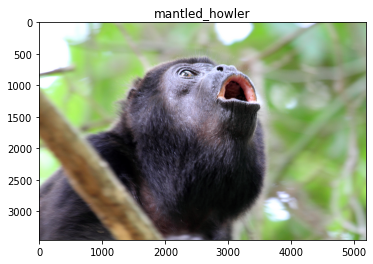

mantled_howler (100.00%)


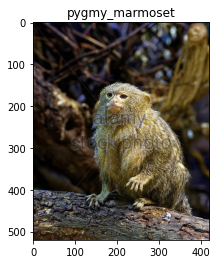

pygmy_marmoset (100.00%)


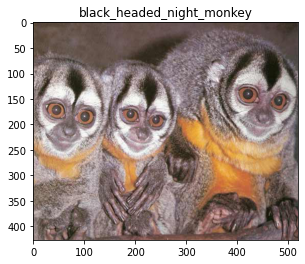

black_headed_night_monkey (100.00%)


In [ ]:
for i, v in zip([t for t in dic_class.keys()], [i for i in dic_class.values()]):

  dic_keys = [t for t in dic_class.keys()]
  dic_values = [i for i in dic_class.values()]

  j = 'validation' # из train data посмотрим по 1 примеру 
  to_dir = PATH+'archive/data_small/'+j+'/'+i

  files_list = os.listdir(to_dir)

  k = 0
  for file_name in files_list:
    image = load_img(to_dir+'/'+file_name, target_size=(224, 224))
    img = mpimg.imread(to_dir+'/'+file_name)
    imgplot = plt.imshow(img)
    plt.title(v)
    plt.show()

    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    y = model.predict(image)
    
    label = np.argmax(y[0]) #decode_predictions(y)
    label_name = dic_values[label]
    label_prob = y[0][label]
    
    print('%s (%.2f%%)' % (label_name, label_prob*100))

    k += 1

    if k == 1: 
      break


угадала всех. Но явно переобучение

In [ ]:
valid_loss, valid_acc = model.evaluate_generator(validation_generator, steps=2) 
print('valid acc:', valid_acc)

valid acc: 0.9750000238418579


## Дообучение

In [ ]:
# 
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### дообучим три последних сверточных слоя

In [ ]:
# Замораживание всех слоев, кроме заданных
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1': # размораживаем слои после этого слоя 
    set_trainable = True

  if set_trainable: 
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
# Причина использования низкой скорости обучения заключается в необходимости ограничить величину изменений,
#  вносимых в представления трех дообучаемых слоев.
#  Слишком большие изменения могут повредить эти представления.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                  train_dir, 
                  target_size=(224, 224), 
                  batch_size=20,
                  class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                        target_size=(224, 224),
                        batch_size=20, 
                        class_mode='categorical')

Found 315 images belonging to 3 classes.
Found 79 images belonging to 3 classes.


In [ ]:
# Архитектура сети
model = Sequential()
model.add(conv_base)
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs=5, 
                              validation_data=validation_generator,
                              validation_steps=2)

Epoch 1/5
10/10 [==============================] - 6s 649ms/step - loss: 0.9886 - acc: 0.5692 - val_loss: 0.6706 - val_acc: 0.7750
Epoch 2/5
10/10 [==============================] - 6s 574ms/step - loss: 0.4609 - acc: 0.8718 - val_loss: 0.4450 - val_acc: 0.9000
Epoch 3/5
10/10 [==============================] - 6s 608ms/step - loss: 0.2936 - acc: 0.9350 - val_loss: 0.3018 - val_acc: 0.9250
Epoch 4/5
10/10 [==============================] - 6s 612ms/step - loss: 0.1583 - acc: 0.9846 - val_loss: 0.2589 - val_acc: 0.9250
Epoch 5/5
10/10 [==============================] - 6s 638ms/step - loss: 0.1045 - acc: 0.9950 - val_loss: 0.2001 - val_acc: 0.9500


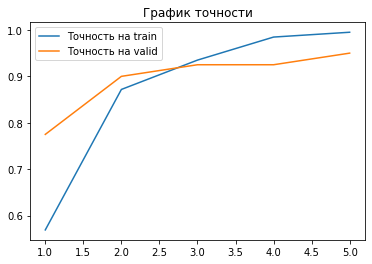

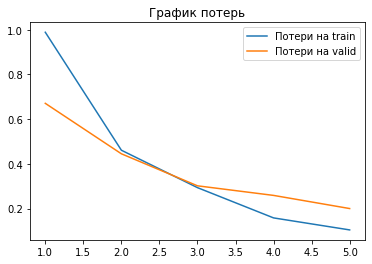

In [ ]:
# Графики работы
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Точность на train') 
plt.plot(epochs, val_acc, label='Точность на valid') 
plt.title('График точности') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Потери на train') 
plt.plot(epochs, val_loss, label='Потери на valid') 
plt.title('График потерь')
plt.legend()
plt.show()

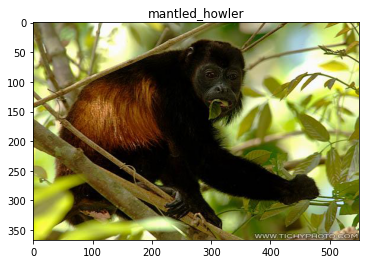

mantled_howler (100.00%)


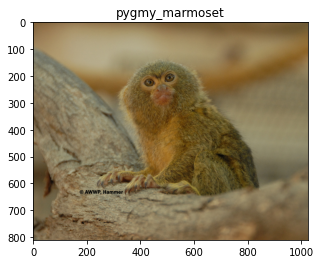

pygmy_marmoset (100.00%)


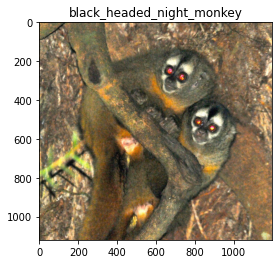

mantled_howler (100.00%)


In [ ]:
for i, v in zip([t for t in dic_class.keys()], [i for i in dic_class.values()]):

  dic_keys = [t for t in dic_class.keys()]
  dic_values = [i for i in dic_class.values()]

  j = 'training' # из train data посмотрим по 1 примеру 
  to_dir = PATH+'archive/data_small/'+j+'/'+i

  files_list = os.listdir(to_dir)

  pred_list = []

  k = 0
  for file_name in files_list:
    image = load_img(to_dir+'/'+file_name, target_size=(224, 224))
    img = mpimg.imread(to_dir+'/'+file_name)
    imgplot = plt.imshow(img)
    plt.title(v)
    plt.show()

    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    y = model.predict(image)
    
    pred_list.append(y[0]) 

    label = np.argmax(y[0]) #decode_predictions(y)
    label_name = dic_values[label]
    label_prob = y[0][label]
    
    print('%s (%.2f%%)' % (label_name, label_prob*100))

    k += 1

    if k == 1: 
      break

с = confusion_matrix([i.argmax() for i in pred_list], [i.argmax() for i in target_test])
print(c)


Без ошибок

In [ ]:
train_loss, train_acc = model.evaluate_generator(train_generator, steps=2) 
print('train acc:', train_acc)

train acc: 1.0


In [ ]:
valid_loss, valid_acc = model.evaluate_generator(validation_generator, steps=2) 
print('valid acc:', valid_acc)

valid acc: 0.925000011920929


матрица ошибок

проверить на чужой картинке обез-н


NameError: ignored

In [ ]:
def get_predict(image_path):
    title_name = image_path
    image_path = PATH+image_path
    image = load_img(image_path, target_size=(224, 224))
    imgplot = plt.imshow(image)
    plt.title(title_name)
    plt.show()

    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    y = model.predict(image)
    
    label = np.argmax(y[0]) #decode_predictions(y)
    label_name = dic_values[label]
    label_prob = y[0][label]
    
    print('%s (%.2f%%)' % (label_name, label_prob*100))

    return label_name, label_prob*100

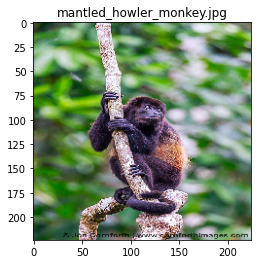

pygmy_marmoset (100.00%)


('pygmy_marmoset', 100.0)

In [ ]:
get_predict('mantled_howler_monkey.jpg')

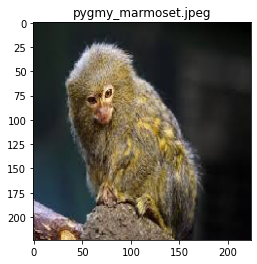

pygmy_marmoset (100.00%)


('pygmy_marmoset', 100.0)

In [ ]:
get_predict('pygmy_marmoset.jpeg')

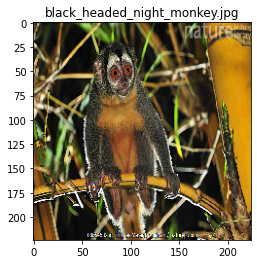

mantled_howler (99.99%)


('mantled_howler', 99.98799562454224)

In [ ]:
get_predict('black_headed_night_monkey.jpg')